# Desafío - Análisis lineal discriminante

Requerimientos

Trabajaremos con una base de datos sobre clientes morosos de un banco (default_credit.csv). Dentro de ésta se registran las siguientes observaciones:

    - default​: Variable Binaria. Registra si el cliente entró en morosidad o no.
    - income​: Ingreso promedio declarado por el cliente.
    - balance​: total del saldo en la cuenta de crédito.
    - student​: Variable binaria. Registra si el cliente es estudiante o no

# Ejercicio 1: Preparación de ambiente de trabajo

- Importe los módulos básicos para el análisis de datos.
- Importe las clases ​LabelEncoder​, ​StandardScaler y ​LabelBinarizer de
preprocessing.
- Importe las funciones ​train_test_split​ y ​cross_val_score​ de ​model_selection
- Importe la función ​classification_report​ de ​metrics​.
- Importe las clases ​LinearDiscriminantAnalysis y
QuadraticDiscriminantAnalysis​.
- Agregue la base de datos en el ambiente de trabajo.
- Inspeccione la distribución de cada atributo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

path_casita = "default_credit.csv"
path_colab = "/content/drive/MyDrive/Data Scientist/Desafío Latam/3 .-Machine Learning/2 .-Algoritmos de clasificación (I)/Desafíos/default_credit.csv"

df = pd.read_csv(path_casita).drop(columns = 'index')
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


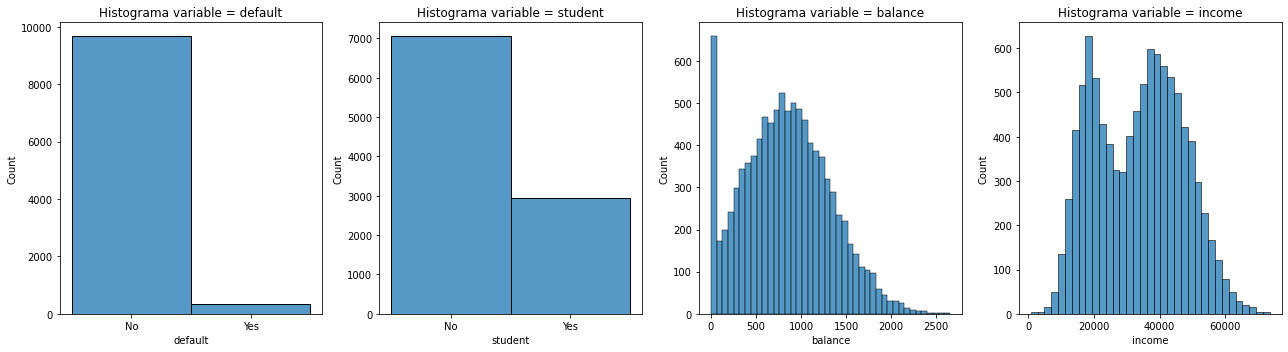

In [2]:
fig, axs = plt.subplots(1, 4, figsize=(18, 5))

for i, j in enumerate(df.columns):
  sns.histplot(data = df, x = j, ax= axs[i]).set_title(f"Histograma variable = {j}")
plt.tight_layout()


In [3]:
#De manera adicional se busca mostrar la cantidad de datos por clase en el vector objetivo
print(df.default.value_counts(normalize = True))
print("")
print(f"El shape de este dataframe es {df.shape}")

No     0.9667
Yes    0.0333
Name: default, dtype: float64

El shape de este dataframe es (10000, 4)


# Ejercicio 2: Modelo base

**¡Estandarizar!

## a) Recuerde que los modelos de ​sklearn no soportan datos que no sean numéricos. Transforme los atributos pertinentes con ​LabelEncoder​.

In [4]:
df['student'] = LabelEncoder().fit_transform(df.student)
df.student.value_counts(normalize = True)
#Notar que 1 = Sí es estudiante y 0 = No es estudiante

0    0.7056
1    0.2944
Name: student, dtype: float64

In [5]:
df.head(20)

,default,student,balance,income
0,No,0,729.526495,44361.625074
1,No,1,817.180407,12106.134700
2,No,0,1073.549164,31767.138947
3,No,0,529.250605,35704.493935
4,No,0,785.655883,38463.495879
5,No,1,919.588530,7491.558572
6,No,0,825.513331,24905.226578
7,No,1,808.667504,17600.451344
8,No,0,1161.057854,37468.529288
9,No,0,0.000000,29275.268293


## b) Genere muestras de validación y entrenamiento, reservando un 33% de los datos como validación. (EXTRA: Estandarice)

In [6]:
X = df.drop(columns = 'default')
y = df.default

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

#Creamos y fiteamos nuestro estandarizador
scaler = StandardScaler().fit(X_train)

#Tranformamos X_train y X_test
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

## c) Genere un modelo con ​LinearDiscriminantAnalysis sin modificar los hiperparámetros. Genere métricas de evaluación utilizando ​classification_report​.

In [7]:
model_lda = LinearDiscriminantAnalysis().fit(X_train, y_train)

y_predict = model_lda.predict(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          No       0.97      1.00      0.99      3194
         Yes       0.84      0.20      0.32       106

    accuracy                           0.97      3300
   macro avg       0.91      0.60      0.65      3300
weighted avg       0.97      0.97      0.96      3300



## d) Comente sobre cuál es el desempeño del modelo en cada clase, así como en general.

**Comentario**

El desempeño del modelo para f1-score de la clase "No" fue de un 99%, mientras que f1-score de la clase "Yes" fue de un 32% aproximadamente, el f1-score asociado al accuracy fue de un 97%.

El accuracy del model es de 97%

# Ejercicio 3: Refactorización 1 - información a priori

Dado que trabajamos con modelos generativos, podemos incluir información exógena. Para este caso agregaremos dos distribuciones:

- Asumamos que hay un 50/50 de morosos y no morosos.
- Asumamos que hay un 60/40 de morosos y no morosos.

Por cada modelo, reporte las métricas de clasificación.

## a) Modelo 50/50 de morosos y no morosos. Reporte las métricas

In [8]:
model_lda_50_50 = LinearDiscriminantAnalysis(priors=(.5,.5)).fit(X_train, y_train)

y_predict_50_50 = model_lda_50_50.predict(X_test)

print(classification_report(y_test, y_predict_50_50))

              precision    recall  f1-score   support

          No       1.00      0.84      0.91      3194
         Yes       0.15      0.90      0.26       106

    accuracy                           0.84      3300
   macro avg       0.57      0.87      0.59      3300
weighted avg       0.97      0.84      0.89      3300



In [9]:
print(confusion_matrix(y_test, y_predict_50_50))

[[2669  525]
 [  11   95]]


**Comentario**

Tanto las métricas de f1-score de cada clase como la general son peores que el modelo anterior

## b) Modelo 60/40 de morosos y no morosos. Reporte las métricas

In [10]:
model_lda_60_40 = LinearDiscriminantAnalysis(priors=(0.4,.6)).fit(X_train, y_train)

y_predict_60_40 = model_lda_60_40.predict(X_test)

print(classification_report(y_test, y_predict_60_40))

              precision    recall  f1-score   support

          No       1.00      0.79      0.88      3194
         Yes       0.13      0.92      0.22       106

    accuracy                           0.79      3300
   macro avg       0.56      0.85      0.55      3300
weighted avg       0.97      0.79      0.86      3300



**Comentario**

Nuevamente, tanto las métricas de de f1-score de cada clase como la general son peores que el primer modelo (el sin cambiar los priors)

# Ejercicio 4: Refactorización 2 - oversampling

Digresión: Synthetic Over(Under) Sampling


- Por lo general podemos intentar aliviar el problema del desbalance de clases mediante
la ponderación dentro del algoritmo. Otra alternativa es el muestreo con reemplazo
dentro de los conjuntos de entrenamiento. Estos métodos clásicos se conocen como
Oversampling cuando repetimos registros aleatorios de la clase minoritaria, y
Undersampling​ cuando eliminamos aleatoriamente registros de la clase mayoritaria.
- Un contratiempo de estos métodos clásicos es que pueden replicar información
sesgada que afecte el desempeño de generalización del modelo. Si los datos son malos,
estaremos replicando estas fallas.
- Otra solución es generar ejemplos de entrenamiento sintéticos mediante el
entrenamiento de ejemplos de la clase minoritaria. A grandes rasgos la solución
funciona de la siguiente forma: En función a un subconjunto de datos correspondientes
a la clase minoritaria, entrenamos algún modelo no supervisado o generativo como
Naive Bayes, KMeans o KNearestNeighbors para generar representaciones sintéticas de
los datos ​en el espacio de atributos de la clase específica mediante
xnuevo−ejemplo = xi + λ(xzi − xi) es un ejemplo de entrenamiento de la clase minoritaria y
λ es un parámetro de interpolación aleatorio λ ~ Uniforme(0, 1)
- Uno de los problemas más graves de esta base de datos, es el fuerte desbalance entre clases. Ahora generaremos observaciones sintéticas mediante SMOTE (Synthetic Minority Oversampling Technique). Para ello, debemos agregar el paquete a nuestro ambiente virtual.

## a) En nuestro terminal agregamos ​<code>conda install -c conda-forge imbalanced-learn​</code>. Incorpore SMOTE en el ambiente de trabajo con la siguiente sintáxis ​<code>from​ imblearn.over_sampling ​import​ SMOTE​</code>.

In [11]:
pip install imbalanced-learn

In [12]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


- Para implementar oversampling, debemos generar nuevos objetos que representan
nuestra muestra de entrenamiento incrementada artificialmente. Para ello implemente la siguiente sintaxis:

      from​ imblearn.over_sampling ​import​ SMOTE
      # Instanciamos la clase
      oversampler = SMOTE(random_state=​11238​, ratio=​'minority'​)
      # generamos el oversampling de la matriz de entrenamiento y
      X_train_oversamp, y_train_oversamp = oversampler.fit_sample(X_train, y_train)

      **ratio='minority'-->aumeta la cantidad de registros de la clase minoritaria (que es lo que normalmente queremos lograr)

In [13]:
oversampler = SMOTE(random_state= 11238,  sampling_strategy= 'minority')
X_train_oversamp, y_train_oversamp = oversampler.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## c) Vuelva a entrenar el modelo con los datos aumentados de forma artificial y comente sobre su desempeño.

In [14]:
model_smote = LinearDiscriminantAnalysis().fit(X_train_oversamp, y_train_oversamp)

y_predict_smote = model_smote.predict(X_test)

print(classification_report(y_test, y_predict_smote))

              precision    recall  f1-score   support

          No       1.00      0.84      0.91      3194
         Yes       0.15      0.90      0.26       106

    accuracy                           0.84      3300
   macro avg       0.57      0.87      0.59      3300
weighted avg       0.97      0.84      0.89      3300



**Comentario**

La clase "No" tiene un menor f1-score que el primer modelo, igualmente la clase "Yes", y de igual forma también el accuracy del f1-score.

# Ejercicio 5: Refactorización 3 - QDA


## a) Por último, implemente un modelo ​QuadraticDiscriminantAnalysis con los datos aumentados artificialmente. Genere las métricas de desempeño.

In [15]:
model_qda = QuadraticDiscriminantAnalysis().fit(X_train_oversamp, y_train_oversamp)

y_predict_qda = model_qda.predict(X_test)

print(classification_report(y_test, y_predict_qda))

              precision    recall  f1-score   support

          No       1.00      0.85      0.92      3194
         Yes       0.17      0.90      0.28       106

    accuracy                           0.85      3300
   macro avg       0.58      0.87      0.60      3300
weighted avg       0.97      0.85      0.90      3300



## b) Comente a grandes rasgos sobre el mejor modelo en su capacidad predictiva.

**Comentario**

El primer modelo fue el mejor en todo sentido, fue el más simple y el que mejor métricas de f1-score arrojó basado tanto en cada clase como el accuracy.